# 9.60 Data Evaluation #


In [238]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [239]:
cleanimages = ["4063.png", "6948.png", "8050.png", "6859.png", "8311.png", "2990.png", "7187.png", "9247.png", "5295.png", "6710.png", "6598.png", "2817.png", "9558.png", "3318.png", "6030.png"]
cleanimage_filepath = "\clean_dataset\images"

In [240]:
def get_labels(item):
    map = {
        "0-2": 0,
        "3-9": 1,
        "10-19": 2,
        "20-29": 3, 
        "30-39": 4,
        "40-49": 5,
        "50-59": 6,
        "60+": 7
    }
    return map[item]

In [241]:
df = pd.read_csv("9.60 Age Detection Experiment (Responses) - Form Responses 1.csv")
df

,Timestamp,(Example) Give your best estimate of the individual's age.,Do you consent for your responses to be used in our analysis?,Give your best estimate of the individual's age.,Give your best estimate of the individual's age..1,Give your best estimate of the individual's age..2,Give your best estimate of the individual's age..3,Give your best estimate of the individual's age..4,Give your best estimate of the individual's age..5,Give your best estimate of the individual's age..6,...,Give your best estimate of the individual's age..27,Give your best estimate of the individual's age..28,Give your best estimate of the individual's age..29,Give your best estimate of the individual's age..30,Give your best estimate of the individual's age..31,Give your best estimate of the individual's age..32,Give your best estimate of the individual's age..33,Give your best estimate of the individual's age..34,Give your best estimate of the individual's age..35,Feedback/Problems
0,4/29/2024 18:21:25,40-49,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,50-59,0-2,40-49,60+,60+,50-59,0-2,10-19,NaN,NaN
1,4/29/2024 18:25:33,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,50-59,0-2,30-39,50-59,60+,50-59,0-2,10-19,NaN,NaN
2,4/29/2024 18:30:36,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,60+,0-2,40-49,60+,60+,50-59,0-2,10-19,NaN,NaN
3,4/29/2024 18:30:38,30-39,Yes,60+,50-59,0-2,0-2,60+,3-9,60+,...,50-59,0-2,20-29,50-59,60+,50-59,0-2,10-19,NaN,NaN
4,4/29/2024 18:32:46,30-39,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,50-59,0-2,20-29,60+,60+,50-59,0-2,10-19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,4/29/2024 21:03:18,20-29,Yes,60+,30-39,0-2,3-9,60+,3-9,60+,...,50-59,0-2,20-29,50-59,50-59,40-49,0-2,10-19,NaN,NaN
110,4/29/2024 21:03:22,30-39,Yes,60+,40-49,0-2,3-9,60+,3-9,60+,...,60+,0-2,20-29,60+,60+,50-59,0-2,10-19,NaN,"Dear Simon Opsahl, As a member of the communit..."
111,4/29/2024 21:06:45,20-29,Yes,60+,40-49,0-2,3-9,60+,10-19,60+,...,40-49,0-2,20-29,30-39,50-59,50-59,0-2,10-19,NaN,NaN
112,4/29/2024 21:24:39,20-29,Yes,60+,50-59,0-2,3-9,60+,3-9,60+,...,60+,0-2,20-29,50-59,50-59,50-59,0-2,10-19,30-39,NaN


In [242]:
cleanimagehumanresults = df.iloc[0:, 3:3+15]
cleanimagehumanresults.columns = cleanimages
cleanimagehumanresults

,4063.png,6948.png,8050.png,6859.png,8311.png,2990.png,7187.png,9247.png,5295.png,6710.png,6598.png,2817.png,9558.png,3318.png,6030.png
0,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,40-49,40-49,60+,40-49,50-59
1,60+,40-49,0-2,3-9,60+,3-9,60+,20-29,0-2,3-9,40-49,40-49,60+,40-49,60+
2,60+,40-49,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,30-39,20-29,50-59,50-59,60+
3,60+,50-59,0-2,0-2,60+,3-9,60+,30-39,0-2,0-2,30-39,40-49,60+,40-49,60+
4,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,50-59,40-49,60+,40-49,50-59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,60+,30-39,0-2,3-9,60+,3-9,60+,20-29,0-2,3-9,20-29,30-39,50-59,30-39,50-59
110,60+,40-49,0-2,3-9,60+,3-9,60+,50-59,0-2,3-9,20-29,30-39,60+,40-49,60+
111,60+,40-49,0-2,3-9,60+,10-19,60+,30-39,0-2,3-9,30-39,30-39,50-59,40-49,50-59
112,60+,50-59,0-2,3-9,60+,3-9,60+,30-39,0-2,3-9,30-39,30-39,50-59,30-39,60+


([<matplotlib.axis.YTick at 0x147d34f50>,
 [Text(0, 0, '0'),
  Text(0, 1, '1'),
  Text(0, 2, '2'),
  Text(0, 3, '3'),
  Text(0, 4, '4')])

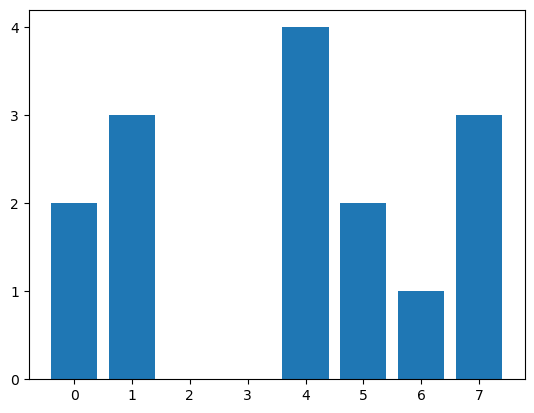

In [243]:
labels = pd.read_csv('datasets/labels.csv')
cleanCategories = {f"{i}":[] for i in range(8)}
cleanCategories
for cleanimage in cleanimages:
    label = labels.loc[labels['image_name'] == cleanimage]["class_label"].item()
    if label == 8:
        cleanCategories["7"].append(cleanimage)
    else:
        cleanCategories[str(label)].append(cleanimage)
cleanCategories
lists = sorted(cleanCategories.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.bar(x, [len(y1) for y1 in y])
plt.yticks([0, 1, 2, 3, 4])
# plt.plot(cleanCategories.keys(), cleanCategories)

In [244]:
jhkfgggggglpairing = []
labels = pd.read_csv('datasets/labels.csv')
for column in cleanimagehumanresults:
    label = (labels.loc[labels['image_name'] == column]["class_label"].item())
    if label ==8:
        label = 7 # accounts for different ranges
    count = 0
    for item in cleanimagehumanresults[column]:
        if (get_labels(item) == label):
            count += 1
    print(labels.loc[labels['image_name'] == column], label,  count/114)
    pairing.append((label, count/114))
    # print(len(cleanimagehumanresults[column].loc[get_labels(cleanimagehumanresults[column].item()) == label]))
new_pairing = []
for label in [0, 1, 2, 3, 4,5 ,6 ,7]:
    count = 0
    val = 0
    for item in pairing:
        if label==(item[0]):
            count += 1
            val += item[1]
    if val != 0:
        new_pairing.append((label, val/count))            
pairing = new_pairing

   image_name  class_label
15   4063.png            8 7 1.0
   image_name  class_label
17   6948.png            4 4 0.24561403508771928
   image_name  class_label
16   8050.png            0 0 0.9298245614035088
   image_name  class_label
12   6859.png            1 1 0.9385964912280702
  image_name  class_label
8   8311.png            8 7 0.9649122807017544
   image_name  class_label
19   2990.png            1 1 0.7017543859649122
   image_name  class_label
38   7187.png            8 7 0.7631578947368421
   image_name  class_label
23   9247.png            4 4 0.42105263157894735
   image_name  class_label
44   5295.png            0 0 0.9824561403508771
   image_name  class_label
29   6710.png            1 1 0.956140350877193
  image_name  class_label
5   6598.png            5 5 0.2543859649122807
   image_name  class_label
24   2817.png            4 4 0.39473684210526316
   image_name  class_label
14   9558.png            6 6 0.5
   image_name  class_label
46   3318.png            4 4 0

In [245]:
df = pd.read_csv("data/Model Data/results_clean.csv")
df['class_label'] = df['class_label'].replace(8, 7)
average_accuracy_clean = list(enumerate(df.groupby('class_label')['accuracy'].mean()))
print(average_accuracy_clean)

[(0, 1.0), (1, 0.8888888888888888), (2, 1.0), (3, 0.46153846153846156), (4, 0.42857142857142855), (5, 0.25), (6, 0.6666666666666666), (7, 0.5)]


In [246]:
DFS = []
filter_accuracies_vit = []
for filter, files in [("Color Shift", [1, 2, 3, 4, 5, 6, 7, 8, 9]), ("Rotation", [11, 12]), ("Blur", [10])]:
    dfs = []
    for file in files:
        df = pd.read_csv(f"data/Model Data/results_filter {file}.csv")
        df['class_label'] = df['class_label'].replace(8, 7)
        dfs.append(df)
    dfs = pd.concat(dfs)
    filter_accuracies_vit.append((filter, list(enumerate(dfs.groupby('class_label')['accuracy'].mean()))))
    DFS.append(dfs)
DFS = pd.concat(DFS)
average_accuracy_dirty = list(enumerate(DFS.groupby('class_label')['accuracy'].mean()))
print(filter_accuracies_vit)

[('Color Shift', [(0, 0.7931034482758621), (1, 0.6808510638297872), (2, 0.9423076923076923), (3, 0.6506024096385542), (4, 0.32608695652173914), (5, 0.14516129032258066), (6, 0.44642857142857145), (7, 0.4666666666666667)]), ('Rotation', [(0, 0.7272727272727273), (1, 0.5454545454545454), (2, 0.75), (3, 0.28), (4, 0.2857142857142857), (5, 0.3333333333333333), (6, 0.8333333333333334), (7, 0.4)]), ('Blur', [(0, 0.75), (1, 0.5), (2, 0.8), (3, 0.625), (4, 0.2222222222222222), (5, 0.0), (6, 0.6666666666666666), (7, 0.6)])]


In [247]:
df = pd.read_csv("9.60 Age Detection Experiment (Responses) - Form Responses 1.csv")

shiftedimagehumanresults = ("Color Shift", df.iloc[0:, 18:18+5], [4645, 6153, 51, 8814, 1150])
rotatedimagehumanresults = ("Rotated", df.iloc[0:, 23:33], [4450, 3520, 2309, 3367, 371, 4645, 3589, 2012, 1148, 8814])
blurredimagehumanresults = ("Blurred", df.iloc[0:, 33:38], [912, 1038, 4781, 4746, 6153])

labels_df = pd.read_csv("datasets/labels 2.csv")

for idx, column in enumerate(shiftedimagehumanresults[1]):
    label = str(labels.loc[labels_df['image_name'] == str(shiftedimagehumanresults[2][idx])+".png"]["class_label"].item())
    if label == "8":
        label = "7" # accounts for different ranges
    count = 0
    print(label)
#     for item in cleanimagehumanresults[column]:
#         if (get_labels(item) == label):
#             count += 1
#     print(labels.loc[labels['image_name'] == column], label,  count/114)
#     pairing.append((label, count/114))
#     # print(len(cleanimagehumanresults[column].loc[get_labels(cleanimagehumanresults[column].item()) == label]))
# new_pairing = []
# for label in [0, 1, 2, 3, 4,5 ,6 ,7]:
#     count = 0
#     val = 0
#     for item in pairing:
#         if label==int(item[0]):
#             count += 1
#             val += item[1]
#     if val != 0:
#         new_pairing.append((label, val/count))            
# pairing = new_pairing

3
4
7
3
4


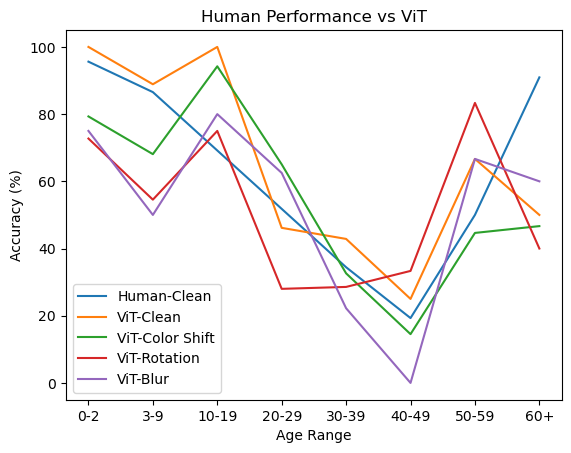

In [248]:
fig, ax = plt.subplots()

ax.plot([int(pair[0]) for pair in pairing], [100*pair[1] for pair in pairing], label = "Human-Clean")
ax.plot([pair[0] for pair in average_accuracy_clean], [100*pair[1] for pair in average_accuracy_clean], label = "ViT-Clean")
for filter, accuracies in filter_accuracies_vit:
    ax.plot([pair[0] for pair in accuracies], [100*pair[1] for pair in accuracies], label = f"ViT-{filter}")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60+"])
ax.set_xlabel("Age Range")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Human Performance vs ViT")
ax.legend()

plt.show()

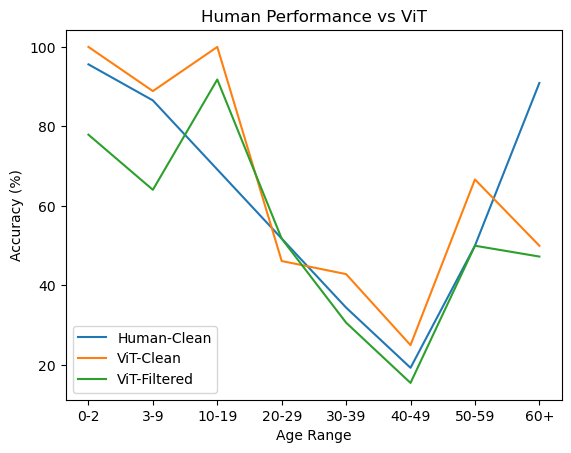

In [249]:
fig, ax = plt.subplots()

ax.plot([int(pair[0]) for pair in pairing], [100*pair[1] for pair in pairing], label = "Human-Clean")
ax.plot([pair[0] for pair in average_accuracy_clean], [100*pair[1] for pair in average_accuracy_clean], label = "ViT-Clean")
ax.plot([pair[0] for pair in average_accuracy_dirty], [100*pair[1] for pair in average_accuracy_dirty], label = "ViT-Filtered")
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax.set_xticklabels(["0-2", "3-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60+"])
ax.set_xlabel("Age Range")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Human Performance vs ViT")
ax.legend()

plt.show()

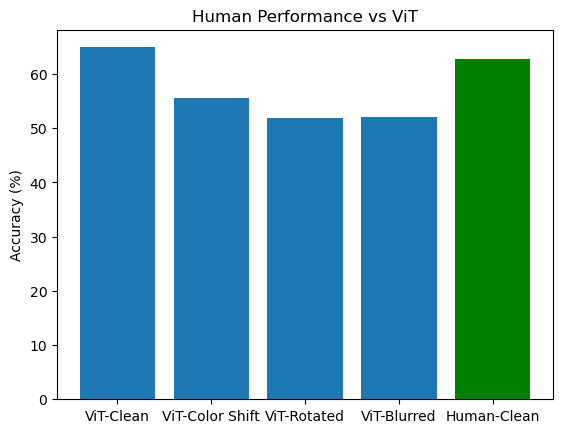

In [250]:
# Assuming you have defined pairing and average_accuracy_clean properly

# fig, ax = plt.subplots()

# Calculate mean accuracies
human_mean_accuracy = np.mean([100*pair[1] for pair in pairing])
vit_mean_accuracy = np.mean([100*pair[1] for pair in average_accuracy_clean])
colorshift = np.mean([100*pair[1] for pair in filter_accuracies_vit[0][1]])
rotated = np.mean([100*pair[1] for pair in filter_accuracies_vit[1][1]])
blurred = np.mean([100*pair[1] for pair in filter_accuracies_vit[2][1]])
 

# Plot the bar plot
plt.bar(["ViT-Clean", "ViT-Color Shift", "ViT-Rotated", "ViT-Blurred"], [vit_mean_accuracy, colorshift, rotated, blurred])
plt.bar(["Human-Clean"], [human_mean_accuracy], color = "green")
# Set labels and title
plt.ylabel("Accuracy (%)")
plt.title("Human Performance vs ViT")

plt.show()
